# Projet python : analyse, traitement et modélisation de données

## 1. Description du projet

Le but du projet est d'analyser un dataset de logs d'incendies informatiques, traiter et créer un modèle de données afin de prédire le temps de complétion (de l'ouverture à le cloture) d'un incendies en fonction de paramètres pertinents.

## 2. Description des données

1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1â€“High; 2â€“Medium; 3â€“Low);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable).

## 3. Import du dataset

In [1]:
#Use pandas

import pandas as pd

df = pd.read_csv("incident_event_log.csv", sep=',', encoding='latin-1')

## 4. Première analyse du dataset

### Première visu

In [2]:
#df[df['number'] == 'INC0028089'][['incident_state','']]

#df.head(10)

df.iloc[0:50, 1:18]

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory
0,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170
1,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170
2,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170
3,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170
4,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215
5,Active,True,1,0,1,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:30,Phone,Location 165,Category 40,Subcategory 215
6,Active,True,1,0,2,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:33,Phone,Location 165,Category 40,Subcategory 215
7,Active,True,1,0,3,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 804,29/2/2016 11:31,Phone,Location 165,Category 40,Subcategory 215
8,Active,True,1,0,4,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 703,29/2/2016 11:32,Phone,Location 165,Category 40,Subcategory 215
9,Active,True,1,0,5,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 332,1/3/2016 09:14,Phone,Location 165,Category 40,Subcategory 215


In [3]:
df.iloc[0:50, 18:36]

,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
5,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
6,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
7,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
8,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
9,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


### Des incompréhensions dans le dataset (new ou closed plusieurs fois)

In [4]:
#Il y'a plus d'incident clos que d'incident crée, allons regarder pourquoi

incendies = df.groupby('number').agg({'incident_state': lambda x : sum(map(lambda y :y =='Closed',list(x)))})
df[df.number.isin(incendies[incendies.incident_state>1].index)]

incendies2 = df.groupby('number').agg({'incident_state': lambda x : sum(map(lambda y :y =='Resolved',list(x)))})
df[df.number.isin(incendies2[incendies2.incident_state==0].index)]

#Nous avons pu voir que certains incendies sont fermés 2 fois pour deux raisons : 
#erreur (fermer deux fois d'affilé) ou réouverture puis refermeture
#Et enfin, si le projet est closed plusieurs fois, c'est la dernière qui est importante. (closed_by, at)

perClosedMore = format(df[df.number.isin(incendies[incendies.incident_state>1].index)]['number'].nunique() / 24918 * 100, '.2f')
perResolvedNo = format(df[df.number.isin(incendies2[incendies2.incident_state==0].index)]['number'].nunique() / 24918 * 100, '.2f')

print("Il y'a : "+str(perClosedMore)+ " % d'incidents fermés plus d'une fois, et : "+str(perResolvedNo)+" % d'incidents non résolus")

Il y'a : 0.23 % d'incidents fermés plus d'une fois, et : 0.05 % d'incidents non résolus


### Changer les formats des dates

In [5]:
import datetime
import numpy as np

# Les dates sont au format object, changeons les en datetime
df['resolved_at'].value_counts()

df['opened_at'] = [datetime.datetime.strptime(dat, '%d/%m/%Y %H:%M') for dat in df['opened_at']]
df['closed_at'] = [datetime.datetime.strptime(dat, '%d/%m/%Y %H:%M') for dat in df['closed_at']]
df['sys_updated_at'] = [datetime.datetime.strptime(dat, '%d/%m/%Y %H:%M') for dat in df['sys_updated_at']]
df['sys_created_at'] = [datetime.datetime.strptime(dat, '%d/%m/%Y %H:%M') if dat != '?' else np.nan for dat in df['sys_created_at']]
df['resolved_at'] = [datetime.datetime.strptime(dat, '%d/%m/%Y %H:%M') if dat != '?' else np.nan for dat in df['resolved_at']]

df.dtypes

number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
caller_id                          object
opened_by                          object
opened_at                  datetime64[ns]
sys_created_by                     object
sys_created_at             datetime64[ns]
sys_updated_by                     object
sys_updated_at             datetime64[ns]
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
cmdb_ci                            object
impact                             object
urgency                            object
priority                           object
assignment_group                  

### Créer une variable : durée ouverture - fermeture

In [6]:
df['new_to_closed'] = df.apply(lambda x: round((x['closed_at'] - x['opened_at']).total_seconds()/3600, 2), axis = 1)

df.head(12)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,new_to_closed
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,130.73
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,130.73
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,130.73
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,130.73
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,149.33
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,149.33
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,149.33
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,149.33
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,149.33
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,149.33


### Identifier les columns peu précises

In [7]:
df['vendor'].value_counts()

#On peut voir que dans les colonnes : problem_id, rfc, vendor, caused_by et cmdb_ci il y'a plus de de 98% de ?

?           141468
code 8s        167
Vendor 1        69
Vendor 3         6
Vendor 2         2
Name: vendor, dtype: int64

## 5. Visualisation graphique des données

### Boîte à moustache de la durée de cloture de chaque incident

In [8]:
import matplotlib.pyplot as plt

dnumber = df.groupby('number').mean()

plt.boxplot(dnumber['new_to_closed'])
plt.show()

plt.boxplot(dnumber['new_to_closed'])
plt.ylim(-10, 700)
plt.show()

print('La moyenne se situe autour de 150 heures pour une cloture')

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

La moyenne se situe autour de 150 heures pour une cloture


### Analyser le temps en fonction de la priorité de l'incident

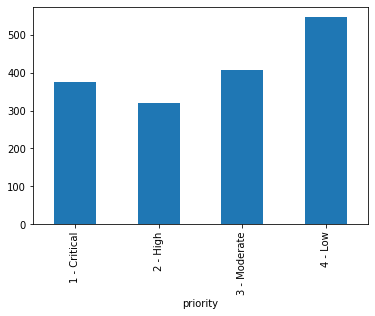

In [9]:
dprio = df.groupby('priority').mean()['new_to_closed']

apriority = dprio.plot.bar(x='priority', y='new_to_closed')

### Analyser l'urgence et l'impact sur la durée de l'incident

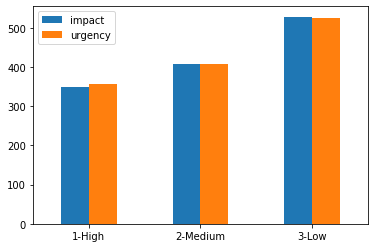

In [10]:
dimpact = df.groupby('impact').mean()
durg = df.groupby('urgency').mean()

newData = pd.DataFrame({'impact': dimpact['new_to_closed'].values, 'urgency': durg['new_to_closed'].values}, index=['1-High','2-Medium','3-Low'])

aNew = newData.plot.bar(rot=0)

### Analyser le nombre de reassignement count sur la durée de l'incident

In [11]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

df['reassignment_count'].value_counts()

dgr = df[['number','reassignment_count','new_to_closed']].groupby('number').max()

dplot = pd.DataFrame({'reassignement': dgr['reassignment_count'], 'durée': dgr['new_to_closed']})

dplot2 = dplot.groupby('reassignement').mean()

#show the data
output_notebook() 
p = figure(plot_width=400, plot_height=400)
p.line(dplot2.index, dplot2['durée'], line_width=2)
show(p)


Loading BokehJS ...

### Analyser le jour et l'heure de l'ouverture de l'incident sur la durée

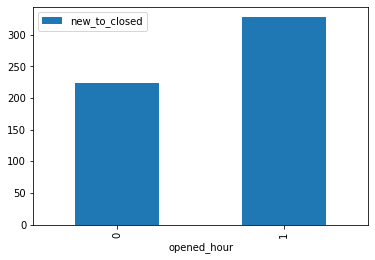

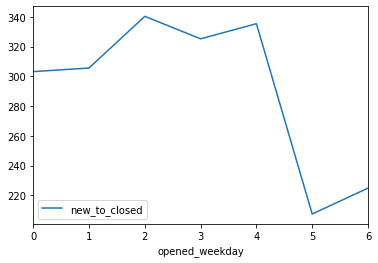

In [12]:
danly = df[['number','opened_at','new_to_closed']].groupby('number').first()
danly['opened_hour']= danly.apply(lambda x: 0 if (x['opened_at'].hour < 8 or x['opened_at'].hour > 19) else 1, axis = 1)
danly['opened_weekday']= danly.apply(lambda x: x['opened_at'].weekday(), axis = 1) 
danly.drop('opened_at', axis=1)

dhour = danly[['opened_hour','new_to_closed']].groupby('opened_hour').mean()
dday = danly[['opened_weekday','new_to_closed']].groupby('opened_weekday').mean()

#print schema
ahour = dhour.plot.bar()
aday = dday.plot.line()

## 6. Aggrégation des données

### Nettoyage des données

In [13]:
import numpy as np
import re

# Nettoyer les colonnes avec des lettres et chiffres, dont seuls les chiffres sont importants

columns_nettoyage = ['caller_id','opened_by','sys_created_by','sys_updated_by','location','category','subcategory','u_symptom','impact','urgency','priority','assignment_group','assigned_to','closed_code','resolved_by']

for col in columns_nettoyage:
    df[col] = [int(re.findall('(\d+)', x)[0]) if x != '?' else np.nan for x in df[col]]

df.dtypes

number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
caller_id                         float64
opened_by                         float64
opened_at                  datetime64[ns]
sys_created_by                    float64
sys_created_at             datetime64[ns]
sys_updated_by                      int64
sys_updated_at             datetime64[ns]
contact_type                       object
location                          float64
category                          float64
subcategory                       float64
u_symptom                         float64
cmdb_ci                            object
impact                              int64
urgency                             int64
priority                            int64
assignment_group                  

#### Toutes les données ont été nettoyées et sont dans un format correct (à part : notify, contact-type, problem_id, rfc, vendor, caused_by et cmdb_ci qui sont imprécises et donc non pertinentes à la corrélation)

### Aggrégations des données

In [14]:
#Aggrégation groupé par le numéro de l'incident

dagg = df.groupby('number').agg({
    'new_to_closed':'first',
    'reassignment_count': 'last',
    'reopen_count':'last',
    'sys_mod_count':'last',
    'made_sla':'last',
    'caller_id':'first',
    'opened_by':'first',
    'opened_at':'first',
    'location':'first',
    'category':'first',
    'subcategory':'first',
    'u_symptom':'last',
    'impact':'last',
    'urgency':'last',
    'priority':'last',
    'knowledge':'first',
    'u_priority_confirmation':'last',
    'closed_code':'first',
    'resolved_by':'last',
})

#Rajout de 3 variables par rapport à l'ouverture de l'incident

dagg['opened_hour']= dagg.apply(lambda x: 0 if (x['opened_at'].hour < 8 or x['opened_at'].hour > 19) else 1, axis = 1) #(0 si la nuit (20h-8h), sinon 1)
dagg['opened_month']= dagg.apply(lambda x: x['opened_at'].month, axis = 1)
dagg['opened_weekday']= dagg.apply(lambda x: x['opened_at'].weekday(), axis = 1) #(0 lundi, 1 mardi, ... ,6 dimanche)

dagg = dagg.drop('opened_at', axis = 1)

dagg.head(510)

,new_to_closed,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,location,category,subcategory,...,impact,urgency,priority,knowledge,u_priority_confirmation,closed_code,resolved_by,opened_hour,opened_month,opened_weekday
number,,,,,,,,,,,,,,,,,,,,,
INC0000045,130.73,0,0,4,True,2403.0,8.0,143.0,55.0,170.0,...,2,2,3,True,False,5.0,149.0,0,2,0
INC0000047,149.33,1,0,8,True,2403.0,397.0,165.0,40.0,215.0,...,2,2,3,True,False,5.0,81.0,0,2,0
INC0000057,140.83,0,0,6,True,4416.0,8.0,204.0,20.0,125.0,...,2,2,3,True,False,10.0,5.0,0,2,0
INC0000060,174.37,0,0,3,True,4491.0,180.0,204.0,9.0,97.0,...,2,2,3,True,False,3.0,113.0,0,2,0
INC0000062,129.03,1,0,7,False,3765.0,180.0,93.0,53.0,168.0,...,1,2,2,True,False,7.0,62.0,0,2,0
INC0000063,129.87,1,0,7,True,2146.0,180.0,93.0,20.0,125.0,...,2,2,3,True,False,7.0,62.0,0,2,0
INC0000064,201.83,1,0,8,True,2838.0,131.0,143.0,53.0,168.0,...,2,2,3,True,False,6.0,71.0,0,2,0
INC0000065,176.37,6,0,13,True,5323.0,131.0,108.0,44.0,229.0,...,2,2,3,True,False,1.0,197.0,0,2,0
INC0000066,174.95,1,0,3,True,3796.0,24.0,161.0,55.0,185.0,...,2,2,3,True,False,5.0,208.0,1,2,0


### Première visu de corrélation des données aggrégés

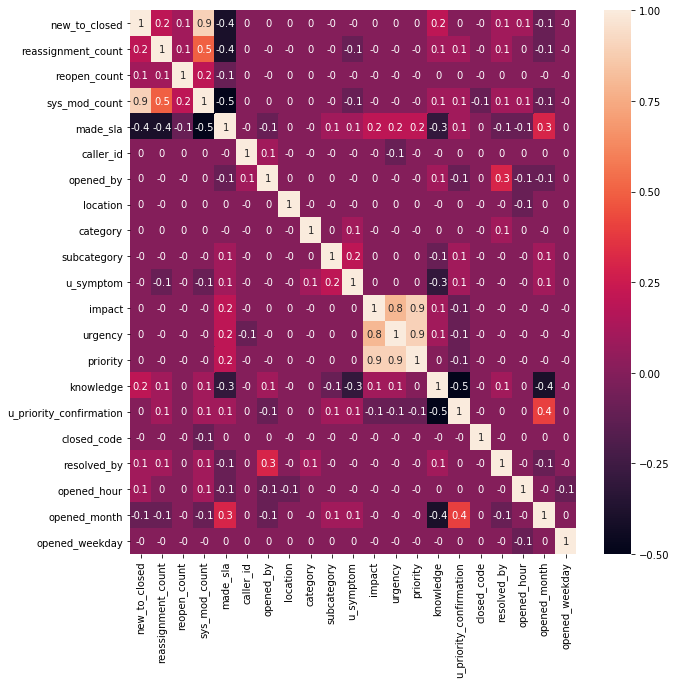

In [15]:
import seaborn as sns

matrice_corr = dagg.corr().round(1)
fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=matrice_corr, annot=True, ax=ax)

## 7. Régression

### Création de X et Y

In [16]:
y = dagg['new_to_closed']
X = dagg.drop('new_to_closed', axis = 1)

print(X.shape, y.shape)

(24918, 20) (24918,)


### Train et test split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
X = imp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18688, 20), (6230, 20), (18688,), (6230,))

### Fonctions score et cross validation

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def get_score(algorithme, X_train, X_test, y_train, y_test, display_graph=False, display_options=True):
    if display_options:
        print("Fitting :\n"+ str(algorithme))
    modele = algorithme.fit(X_train, y_train)
    score  = modele.score(X_test, y_test)
    if display_graph:
        import matplotlib.pyplot as plt
        plt.scatter(x=y_test, y=algorithme.predict(X_test)) ## Predictions against True values
    return score

def multiple_cross_val_scores(algorithme, X, y):
    import numpy as np
    results=dict()
    for kfold in range(3,100, 20):
        score = cross_val_score(algorithme, X, y,  cv = KFold(shuffle=True, n_splits=kfold), scoring='r2')
        results[kfold] = score.mean(), score.std()
    return results

### Simple régresssion linéaire

Fitting :
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


0.8696082037129247

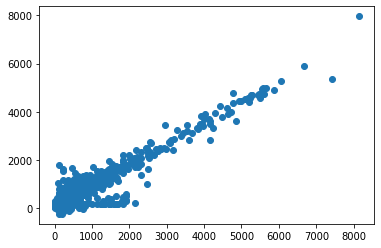

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

get_score(reg, X_train, X_test, y_train, y_test, True)

In [20]:
reg.coef_

array([-9.57038000e+01, -3.24699293e+02,  6.18077042e+01, -8.00292975e+01,
       -5.00948061e-06,  3.37037542e-02,  3.75935952e-02,  5.34684123e-01,
        1.60862045e-02,  3.36176215e-02, -4.04487258e+01, -7.38574401e+01,
        1.48162999e+02,  2.92787568e+01, -9.75232165e+01,  4.29175706e-01,
       -1.71955884e-01,  1.72330551e+01,  6.83281545e+00,  2.82800044e+00])

In [21]:
multiple_cross_val_scores(reg, X, y)

{3: (0.8231220937436515, 0.023005672573878488),
 23: (0.8243919094073213, 0.055207343682251164),
 43: (0.8207219913907273, 0.08240506251912404),
 63: (0.8159880662192949, 0.11129640563452284),
 83: (0.8089554558354284, 0.10250636979858099)}

### Decision tree regressor

Fitting :
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


0.765894435992462

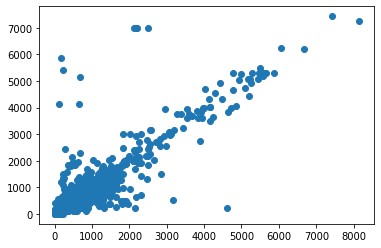

In [22]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

get_score(dtr, X_train, X_test, y_train, y_test, True)

In [23]:
multiple_cross_val_scores(dtr, X, y)

{3: (0.7795577242267111, 0.018828761551972308),
 23: (0.7533812210152635, 0.1243270737106105),
 43: (0.7786957317516142, 0.10889110582738361),
 63: (0.7418456257190285, 0.22232481119334957),
 83: (0.764127700236994, 0.2263573181299429)}

### Random Forest

Fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


0.8997167430519893

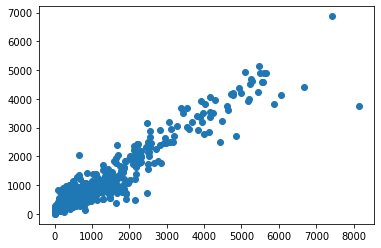

In [24]:
from sklearn.ensemble import RandomForestRegressor

hyperparametres = {"n_estimators" :  30, "max_features" :  3, "max_depth" : 50,}
rf = RandomForestRegressor(**hyperparametres)

get_score(rf, X_train, X_test, y_train, y_test, True)

### Extras Tree Regressor

Fitting :
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=12,
                    max_features=20, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators='warn',
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)


C:\Users\vava7\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9347423300459481

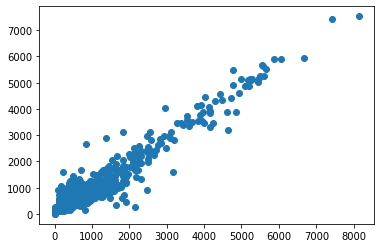

In [25]:
from sklearn.ensemble import ExtraTreesRegressor

hyperparametres = {"max_features" :  20, "max_depth" : 12,}
etr = ExtraTreesRegressor(**hyperparametres)

get_score(etr, X_train, X_test, y_train, y_test, True)

### Passive Agressive

Fitting :
PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.2, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=100,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


0.811384164372696

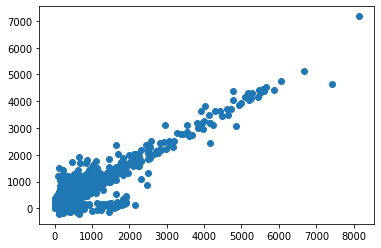

In [37]:
from sklearn.linear_model import PassiveAggressiveRegressor

pa = PassiveAggressiveRegressor(max_iter=100, epsilon=0.2)
get_score(pa, X_train, X_test, y_train, y_test, True)

### AdaBoost

Fitting :
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)


0.477201199474059

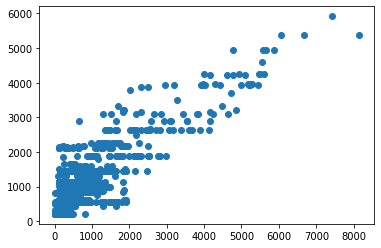

In [27]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=0, n_estimators=100)
get_score(ada, X_train, X_test, y_train, y_test, True)

### Catboost

In [92]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(task_type="CPU")
modele = cat.fit(X_train, y_train)
score = cat.score(X_test, y_test)

score

0:	learn: 525.1061256	total: 7.4ms	remaining: 7.39s
1:	learn: 512.8393594	total: 11.3ms	remaining: 5.63s
2:	learn: 501.1164771	total: 15ms	remaining: 4.97s
3:	learn: 489.7981478	total: 19.1ms	remaining: 4.76s
4:	learn: 479.4285471	total: 24.7ms	remaining: 4.92s
5:	learn: 469.3448728	total: 28.3ms	remaining: 4.68s
6:	learn: 459.9532524	total: 31.6ms	remaining: 4.48s
7:	learn: 450.4183980	total: 35.2ms	remaining: 4.37s
8:	learn: 440.8587744	total: 38.6ms	remaining: 4.25s
9:	learn: 431.7993608	total: 41.8ms	remaining: 4.14s
10:	learn: 423.4086726	total: 45.4ms	remaining: 4.08s
11:	learn: 414.8064269	total: 49.3ms	remaining: 4.06s
12:	learn: 406.9657599	total: 53.2ms	remaining: 4.04s
13:	learn: 399.2916504	total: 56.6ms	remaining: 3.99s
14:	learn: 391.7508945	total: 59.8ms	remaining: 3.93s
15:	learn: 384.4896865	total: 64.1ms	remaining: 3.94s
16:	learn: 377.3964933	total: 67.9ms	remaining: 3.92s
17:	learn: 370.3749080	total: 71.4ms	remaining: 3.89s
18:	learn: 363.5970117	total: 74.8ms	rema

172:	learn: 185.9888685	total: 862ms	remaining: 4.12s
173:	learn: 185.9206576	total: 866ms	remaining: 4.11s
174:	learn: 185.8403091	total: 873ms	remaining: 4.12s
175:	learn: 185.7386840	total: 878ms	remaining: 4.11s
176:	learn: 185.6803662	total: 883ms	remaining: 4.11s
177:	learn: 185.4340885	total: 890ms	remaining: 4.11s
178:	learn: 185.3979359	total: 896ms	remaining: 4.11s
179:	learn: 185.2918016	total: 910ms	remaining: 4.14s
180:	learn: 185.2159505	total: 916ms	remaining: 4.14s
181:	learn: 185.1641184	total: 922ms	remaining: 4.14s
182:	learn: 185.0560990	total: 928ms	remaining: 4.14s
183:	learn: 184.9735116	total: 936ms	remaining: 4.15s
184:	learn: 184.9367341	total: 953ms	remaining: 4.2s
185:	learn: 184.8686597	total: 959ms	remaining: 4.2s
186:	learn: 184.7707832	total: 967ms	remaining: 4.21s
187:	learn: 184.7307321	total: 973ms	remaining: 4.2s
188:	learn: 184.6129941	total: 981ms	remaining: 4.21s
189:	learn: 184.4554338	total: 994ms	remaining: 4.24s
190:	learn: 184.3415220	total: 

336:	learn: 172.7250085	total: 1.9s	remaining: 3.73s
337:	learn: 172.6816956	total: 1.9s	remaining: 3.72s
338:	learn: 172.6112772	total: 1.91s	remaining: 3.72s
339:	learn: 172.5300065	total: 1.91s	remaining: 3.71s
340:	learn: 172.4402263	total: 1.92s	remaining: 3.71s
341:	learn: 172.4130662	total: 1.93s	remaining: 3.7s
342:	learn: 172.3010507	total: 1.93s	remaining: 3.7s
343:	learn: 172.2356932	total: 1.94s	remaining: 3.69s
344:	learn: 172.1749320	total: 1.94s	remaining: 3.69s
345:	learn: 172.1340879	total: 1.95s	remaining: 3.68s
346:	learn: 172.0295769	total: 1.95s	remaining: 3.68s
347:	learn: 171.9468303	total: 1.96s	remaining: 3.67s
348:	learn: 171.8426156	total: 1.96s	remaining: 3.66s
349:	learn: 171.7921681	total: 1.97s	remaining: 3.65s
350:	learn: 171.7142129	total: 1.97s	remaining: 3.65s
351:	learn: 171.6272448	total: 1.98s	remaining: 3.65s
352:	learn: 171.6130646	total: 1.99s	remaining: 3.64s
353:	learn: 171.5562747	total: 1.99s	remaining: 3.64s
354:	learn: 171.5003808	total: 2

510:	learn: 162.1124958	total: 2.93s	remaining: 2.81s
511:	learn: 162.0863315	total: 2.94s	remaining: 2.8s
512:	learn: 162.0526970	total: 2.95s	remaining: 2.8s
513:	learn: 162.0179839	total: 2.96s	remaining: 2.79s
514:	learn: 161.9917654	total: 2.96s	remaining: 2.79s
515:	learn: 161.9839556	total: 2.97s	remaining: 2.78s
516:	learn: 161.9499492	total: 2.97s	remaining: 2.78s
517:	learn: 161.9052071	total: 2.98s	remaining: 2.77s
518:	learn: 161.8102439	total: 2.99s	remaining: 2.77s
519:	learn: 161.7863584	total: 2.99s	remaining: 2.76s
520:	learn: 161.7615972	total: 3s	remaining: 2.75s
521:	learn: 161.7218510	total: 3s	remaining: 2.75s
522:	learn: 161.7166559	total: 3.01s	remaining: 2.74s
523:	learn: 161.6419459	total: 3.01s	remaining: 2.74s
524:	learn: 161.5148161	total: 3.02s	remaining: 2.73s
525:	learn: 161.4806524	total: 3.03s	remaining: 2.73s
526:	learn: 161.3813193	total: 3.05s	remaining: 2.73s
527:	learn: 161.3452625	total: 3.05s	remaining: 2.73s
528:	learn: 161.3210850	total: 3.06s

683:	learn: 154.2902188	total: 3.96s	remaining: 1.83s
684:	learn: 154.2671834	total: 3.97s	remaining: 1.82s
685:	learn: 154.2390804	total: 3.98s	remaining: 1.82s
686:	learn: 154.2098349	total: 3.98s	remaining: 1.81s
687:	learn: 154.1324738	total: 3.99s	remaining: 1.81s
688:	learn: 154.0782236	total: 3.99s	remaining: 1.8s
689:	learn: 154.0170934	total: 4s	remaining: 1.8s
690:	learn: 153.9414825	total: 4.01s	remaining: 1.79s
691:	learn: 153.8892026	total: 4.01s	remaining: 1.78s
692:	learn: 153.8440224	total: 4.02s	remaining: 1.78s
693:	learn: 153.8383208	total: 4.03s	remaining: 1.77s
694:	learn: 153.8135534	total: 4.03s	remaining: 1.77s
695:	learn: 153.7813841	total: 4.04s	remaining: 1.76s
696:	learn: 153.7186734	total: 4.04s	remaining: 1.76s
697:	learn: 153.6483094	total: 4.05s	remaining: 1.75s
698:	learn: 153.6270379	total: 4.06s	remaining: 1.75s
699:	learn: 153.5511071	total: 4.06s	remaining: 1.74s
700:	learn: 153.5286352	total: 4.07s	remaining: 1.74s
701:	learn: 153.4806671	total: 4.

846:	learn: 147.2295502	total: 4.99s	remaining: 902ms
847:	learn: 147.1982964	total: 5s	remaining: 896ms
848:	learn: 147.1703825	total: 5s	remaining: 890ms
849:	learn: 147.1451409	total: 5.01s	remaining: 884ms
850:	learn: 147.0892681	total: 5.01s	remaining: 878ms
851:	learn: 147.0395834	total: 5.02s	remaining: 872ms
852:	learn: 146.9369433	total: 5.03s	remaining: 866ms
853:	learn: 146.9347978	total: 5.04s	remaining: 862ms
854:	learn: 146.9107904	total: 5.05s	remaining: 856ms
855:	learn: 146.8719948	total: 5.05s	remaining: 850ms
856:	learn: 146.8528730	total: 5.06s	remaining: 844ms
857:	learn: 146.7949839	total: 5.07s	remaining: 838ms
858:	learn: 146.7679799	total: 5.07s	remaining: 833ms
859:	learn: 146.7658687	total: 5.08s	remaining: 827ms
860:	learn: 146.7585827	total: 5.09s	remaining: 821ms
861:	learn: 146.7104177	total: 5.09s	remaining: 815ms
862:	learn: 146.6809163	total: 5.1s	remaining: 809ms
863:	learn: 146.6240204	total: 5.1s	remaining: 803ms
864:	learn: 146.5027431	total: 5.11s

0.9438550925213917

## 8. Qui a le meilleur score ? (Faisons varier les hyperparamètres)

In [93]:
#create the dataframe
import random

dscore = pd.DataFrame(columns=['Name','min','mean','max'])
data = {'Name':[],'min':[],'mean':[],'max':[]}

def remplirData(Name, array):
    data['Name'].append(Name)
    data['min'].append(round(min(array),2))
    data['mean'].append(round(sum(array) / len(array),2))
    data['max'].append(round(max(array),2))
    

#simple régression linéaire
reg = LinearRegression()
score = get_score(reg, X_train, X_test, y_train, y_test, display_options=False)
remplirData('Reg', [score, score, score])

#Decision Tree regressor
array_tr = []
for i in range(10):
    hyperparametres = {"presort": random.choice([True,False]) , "max_features" :  random.randint(1, 5), "max_depth" : random.randint(10, 50),}
    dtr = DecisionTreeRegressor(**hyperparametres)
    array_tr.append(get_score(dtr, X_train, X_test, y_train, y_test, display_options=False))
remplirData('D Tree Reg', array_tr)


#Random Forest
array_rf = []
for i in range(10):
    hyperparametres = {"n_estimators" :  random.randint(10, 30), "max_features" :  random.randint(1, 5), "max_depth" : random.randint(10, 50),}
    rf = RandomForestRegressor(**hyperparametres)
    array_rf.append(get_score(rf, X_train, X_test, y_train, y_test, display_options=False))
remplirData('Ran F', array_rf)

#Extra Tree Regressor
array_etr = []
for i in range(10):
    hyperparametres = {"max_features" :  random.randint(10, 20), "max_depth" : random.randint(10, 40),}
    etr = ExtraTreesRegressor(**hyperparametres)
    array_etr.append(get_score(etr, X_train, X_test, y_train, y_test, display_options=False))
remplirData('Ex Tree Reg', array_etr)

#Passive Agressive
array_pa = []
for i in range(10):
    hyperparametres = {"max_iter" :  random.randint(50, 100), "epsilon" : round(random.random(),1),}
    pa = PassiveAggressiveRegressor(max_iter=100)
    array_pa.append(get_score(pa, X_train, X_test, y_train, y_test, display_options=False))
remplirData('Pas Agg', array_pa)

#Ada Boost
array_ada = []
for i in range(10):
    hyperparametres = {"n_estimators" :  random.randint(10, 30), "random_state" : random.randint(0, 5),}
    ada = AdaBoostRegressor(**hyperparametres)
    array_ada.append(get_score(ada, X_train, X_test, y_train, y_test, display_options=False))
remplirData('Ada Boost', array_ada)

#Cat Boost
array_cat = []
for i in range(10):
    hyperparametres = {"n_estimators" :  random.randint(10, 30), "max_depth" : random.randint(1, 16), "task_type":"CPU",}
    cat = CatBoostRegressor(**hyperparametres)
    modele = cat.fit(X_train, y_train)
    array_cat.append(cat.score(X_test, y_test))
remplirData('Cat Boost', array_cat)

data

C:\Users\vava7\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vava7\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vava7\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vava7\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vava7\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0:	learn: 525.4694239	total: 19.1ms	remaining: 363ms
1:	learn: 513.2568343	total: 29.2ms	remaining: 262ms
2:	learn: 501.9230043	total: 38.7ms	remaining: 219ms
3:	learn: 490.9168317	total: 45.4ms	remaining: 182ms
4:	learn: 480.2612931	total: 55ms	remaining: 165ms
5:	learn: 470.1840329	total: 65.3ms	remaining: 152ms
6:	learn: 460.1113488	total: 76.4ms	remaining: 142ms
7:	learn: 450.4901158	total: 87.1ms	remaining: 131ms
8:	learn: 441.0070560	total: 101ms	remaining: 123ms
9:	learn: 432.0455240	total: 111ms	remaining: 111ms
10:	learn: 423.5982889	total: 121ms	remaining: 99ms
11:	learn: 414.9017750	total: 132ms	remaining: 88.2ms
12:	learn: 406.6827365	total: 143ms	remaining: 76.9ms
13:	learn: 398.5757521	total: 153ms	remaining: 65.7ms
14:	learn: 391.0811905	total: 165ms	remaining: 54.9ms
15:	learn: 383.7684575	total: 175ms	remaining: 43.8ms
16:	learn: 376.4905174	total: 186ms	remaining: 32.8ms
17:	learn: 369.5690474	total: 198ms	remaining: 22ms
18:	learn: 363.2279980	total: 209ms	remaining:

10:	learn: 425.8985075	total: 2.75s	remaining: 4.25s
11:	learn: 417.7118415	total: 3.12s	remaining: 4.16s
12:	learn: 409.2447635	total: 3.15s	remaining: 3.63s
13:	learn: 401.5004658	total: 3.52s	remaining: 3.52s
14:	learn: 395.1634033	total: 3.95s	remaining: 3.42s
15:	learn: 387.6397390	total: 4.37s	remaining: 3.27s
16:	learn: 380.1886921	total: 4.73s	remaining: 3.06s
17:	learn: 372.8889319	total: 5.13s	remaining: 2.85s
18:	learn: 366.6880976	total: 5.31s	remaining: 2.51s
19:	learn: 360.2627733	total: 5.68s	remaining: 2.27s
20:	learn: 353.6238435	total: 6.06s	remaining: 2.02s
21:	learn: 347.5507482	total: 6.45s	remaining: 1.76s
22:	learn: 341.8258667	total: 6.87s	remaining: 1.49s
23:	learn: 336.7412778	total: 7.28s	remaining: 1.21s
24:	learn: 331.3466566	total: 7.72s	remaining: 927ms
25:	learn: 325.8006730	total: 8.11s	remaining: 623ms
26:	learn: 320.8457599	total: 8.49s	remaining: 314ms
27:	learn: 316.0711533	total: 8.83s	remaining: 0us
0:	learn: 525.4684088	total: 23.2ms	remaining: 5

{'Name': ['Reg',
  'D Tree Reg',
  'Ran F',
  'Ex Tree Reg',
  'Pas Agg',
  'Ada Boost',
  'Cat Boost'],
 'min': [0.87, 0.25, 0.78, 0.92, -0.03, 0.48, 0.37],
 'mean': [0.87, 0.64, 0.86, 0.93, 0.64, 0.6, 0.55],
 'max': [0.87, 0.79, 0.92, 0.94, 0.81, 0.71, 0.72]}

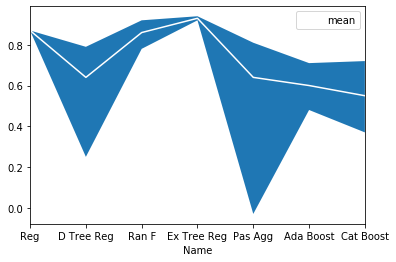

In [94]:
dscore = pd.DataFrame.from_dict(data)


ax  = dscore.plot(x='Name', y='mean', c='white')
ascore = plt.fill_between(x='Name',y1='min',y2='max', data=dscore)